In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tqdm.notebook import tqdm

from IPython.display import display
pd.set_option('display.max_columns', None) # Display all columns in a pandas dataframe

In [2]:
# Load data
df_patients = pd.read_csv("data/raw/Patienten.csv")
df_anamnesis = pd.read_csv("data/raw/Anamnese_korrigiert.csv")
df_densitometry = pd.read_csv("data/raw/Densitometrie_korrigiert.csv")
df_fracture_risk = pd.read_csv("data/raw/Fraktur_Risiko.csv")
df_medicaments = pd.read_csv("data/raw/Medikamente.csv")
df_verteb_fractures = pd.read_csv("data/raw/Vertebral_Frakturen.csv")
df_other_fractures = pd.read_csv("data/raw/Andere_Frakturen.csv")

display(df_patients, df_anamnesis, df_densitometry, df_fracture_risk, df_medicaments, df_verteb_fractures, df_other_fractures)

,centerId,patientId,geburtsdatum,geschlecht,alter,ersterTermin,letzterTermin,top4PatientId
0,2,2988,1950-01-27,female,65.0,2015-01-29,2015-01-29,45.0
1,2,2989,1943-12-31,male,72.7,2016-08-30,2016-08-30,46.0
2,2,2990,1934-06-23,female,80.9,2015-05-19,2015-05-19,47.0
3,2,2991,1961-03-29,female,54.7,2015-12-02,2022-06-16,48.0
4,2,2992,1935-02-09,female,78.6,2013-09-04,2016-09-12,49.0
...,...,...,...,...,...,...,...,...
19884,28,19953,1949-05-07,female,73.1,2022-05-27,2022-06-24,NaN
19885,28,19968,1968-04-17,female,54.1,2022-05-31,2022-05-31,NaN
19886,28,19970,1963-09-20,female,58.7,2022-05-31,2022-05-31,NaN
19887,28,20001,1933-05-21,male,89.0,2022-06-03,2022-06-03,NaN


,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,bariatrische_chirurgie,hiv positiv,todesdatum,osteoporose ist todesursache,weitere_konsultation
0,7,782,1932-08-14,1.0,NaN,NaN,151.0,60.0,26.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,13908,2017-06-19,1.0,NaN,NaN,165.0,56.0,20.6,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,14481,2020-07-09,1.0,NaN,0.0,171.0,82.1,28.1,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2,17517,2021-07-08,1.0,NaN,0.0,168.5,53.0,18.7,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2,3706,2001-03-06,1.0,NaN,NaN,160.0,54.0,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33573,7,2337,2022-11-17,1.0,NaN,0.0,157.0,51.0,20.7,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
33574,7,1902,2022-11-17,1.0,NaN,0.0,163.5,64.0,23.9,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
33575,7,1573,2022-11-17,1.0,NaN,0.0,164.0,72.0,26.8,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
33576,7,1006,2022-11-17,1.0,NaN,0.0,170.5,58.0,20.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


,centerId,patientId,Datum,messort,seite,tscore,tbs
0,8,1,2018-06-01,lws,NaN,-1.0,1.470
1,8,1,2018-06-01,neck,left,-1.8,NaN
2,8,1,2018-06-01,totalHip,left,-1.2,NaN
3,8,1,2020-10-23,lws,NaN,-0.8,1.408
4,8,1,2020-10-23,neck,left,-2.1,NaN
...,...,...,...,...,...,...,...
146381,28,20008,2022-06-14,lws,NaN,-3.6,1.141
146382,28,20008,2022-06-14,neck,left,-2.5,NaN
146383,28,20008,2022-06-14,radius,right,-2.7,NaN
146384,28,20008,2022-06-14,radiusUlna,right,-2.8,NaN


,centerId,patientId,datum,tscore,10_j_frakturrisiko
0,2,2988,2015-01-29,-1.5,8.0
1,2,2989,2016-08-30,-1.4,6.0
2,2,2990,2015-05-19,-1.0,19.8
3,2,2991,2015-12-02,-1.0,8.8
4,2,2991,2018-07-09,-1.1,10.2
...,...,...,...,...,...
32486,28,19952,2022-06-27,-2.0,33.5
32487,28,19953,2022-06-24,-2.7,48.6
32488,28,19968,2022-04-28,-2.4,7.3
32489,28,19970,2022-04-20,-3.8,19.5


,centerId,patientId,medikamentId,medikament,einzeldosis,einheit,intervall,beginnDatum,endDatum,gruppe
0,2,2992,691,bonviva i.v.,3,mg,3m,2013-09-15,NaN,bisphosphonat
1,2,2996,2410,ibandronat sandoz i.v.,3,mg,3m,2022-01-27,NaN,bisphosphonat
2,2,2998,690,bonviva 150 mg,150,mg,m,2011-09-30,2015-09-30,bisphosphonat
3,2,2998,2410,ibandronat sandoz i.v.,3,mg,3m,2018-11-01,NaN,bisphosphonat
4,2,3000,2060,fosamax wochentabletten,70,µg,w,2005-06-01,2012-04-30,bisphosphonat
...,...,...,...,...,...,...,...,...,...,...
15603,28,19316,76,aclasta,5,mg,y,2021-11-12,NaN,bisphosphonat
15604,28,19337,789,calcimagon-d3/- forte,500/800,mg/IE,d,2022-02-14,NaN,NaN
15605,28,19337,76,aclasta,5,mg,y,2022-02-18,NaN,bisphosphonat
15606,28,19369,690,bonviva 150 mg,150,mg,m,2017-01-01,NaN,bisphosphonat


,centerId,patientId,Wirbel,grad,jahr,monat,tag,kommentar
0,2,2992,L1,1.0,2013,0.0,0.0,NaN
1,2,3008,Th10,3.0,2022,4.0,5.0,NaN
2,2,3012,Th7,3.0,2007,0.0,0.0,NaN
3,2,3012,L5,1.0,2019,0.0,0.0,NaN
4,2,3014,L4,-1.0,2016,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
5929,28,19332,?,1.0,2020,0.0,0.0,???
5930,28,19333,?,1.0,2021,0.0,0.0,???
5931,28,19340,?,1.0,2021,0.0,0.0,???
5932,28,19341,?,1.0,2021,0.0,0.0,???


,centerId,patientId,frakturTyp,seite,xray,jahr,monat,tag,kommentar
0,2,2992,Pelvis,NaN,1.0,2013,0.0,0.0,NaN
1,2,2996,Schenkelhals,left,1.0,2021,5.0,15.0,NaN
2,2,2998,Rippen,NaN,1.0,2009,0.0,0.0,NaN
3,2,3000,Radius,NaN,1.0,2009,0.0,0.0,NaN
4,2,3001,Sacrum,NaN,1.0,2012,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
8445,28,19943,Schenkelhals,left,1.0,2022,5.0,4.0,NaN
8446,28,19952,Schenkelhals,right,1.0,2022,5.0,23.0,NaN
8447,28,19953,Femur,right,1.0,2022,5.0,21.0,NaN
8448,28,20001,Schenkelhals,left,1.0,2022,6.0,1.0,NaN


In [3]:
# Selct all female patients
female_patientIds = df_patients[df_patients.geschlecht == "female"].patientId
df_anamnesis_female = df_anamnesis[df_anamnesis["patientId"].isin(female_patientIds)]
df_anamnesis_female = df_anamnesis_female.reset_index(drop=True)
df_anamnesis_female

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,bariatrische_chirurgie,hiv positiv,todesdatum,osteoporose ist todesursache,weitere_konsultation
0,7,782,1932-08-14,1.0,NaN,NaN,151.0,60.0,26.3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,13908,2017-06-19,1.0,NaN,NaN,165.0,56.0,20.6,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,14481,2020-07-09,1.0,NaN,0.0,171.0,82.1,28.1,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,1.0,NaN,0.0,1.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3,2,17517,2021-07-08,1.0,NaN,0.0,168.5,53.0,18.7,1.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,2,3706,2001-03-06,1.0,NaN,NaN,160.0,54.0,21.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29322,7,2337,2022-11-17,1.0,NaN,0.0,157.0,51.0,20.7,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
29323,7,1902,2022-11-17,1.0,NaN,0.0,163.5,64.0,23.9,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
29324,7,1573,2022-11-17,1.0,NaN,0.0,164.0,72.0,26.8,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
29325,7,1006,2022-11-17,1.0,NaN,0.0,170.5,58.0,20.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Add information from df_patients to df_anamnesis_female
# Drop all male patients

df_patients.set_index("patientId", inplace=True)
for i in range(len(df_anamnesis_female.index)):
    patientId = df_anamnesis_female.loc[i, "patientId"]
    patient_info = df_patients.loc[patientId, :]
    gender = patient_info["geschlecht"]
    if gender == "male":
        df_anamnesis_female.drop(i, inplace=True)
        continue
    else:
        df_anamnesis_female.loc[i, "geschlecht"] = gender
    # calculate age
    birthday = datetime.datetime.fromisoformat(patient_info["geburtsdatum"])
    date = datetime.datetime.fromisoformat(df_anamnesis_female.loc[i, "Datum"])
    age = round(((date - birthday).days) / 365, 1)
    df_anamnesis_female.loc[i, "alter"] = age
df_anamnesis_female = df_anamnesis_female.sort_values(by=["patientId", "Datum"]).reset_index(drop=True)

# Missing Value Imputation

## Impute missing values of Anamnesis dataframe

In [5]:
def calculate_stats(df):
    nans = ['%.2f'%(100-n) for n in df.isna().sum()/len(df.index)*100]
    df_stats = df.describe(include="all").loc[['mean', '50%', 'min', '25%', '75%', 'max'], :].T
    df_stats['Total(%)'] = nans
    return df_stats, nans

df_stats, nans = calculate_stats(df_anamnesis_female)
df_stats

,mean,50%,min,25%,75%,max,Total(%)
centerId,3.828929,2.0,2.0,2.0,7.0,28.0,100.00
patientId,8204.882702,7438.0,1.0,3305.5,12502.5,20008.0,100.00
Datum,NaN,NaN,NaN,NaN,NaN,NaN,100.00
postmenopausal,1.0,1.0,1.0,1.0,1.0,1.0,88.09
praemenopausal,1.0,1.0,1.0,1.0,1.0,1.0,7.83
hrt,0.084019,0.0,0.0,0.0,0.0,1.0,65.91
groesse,161.347234,161.0,130.0,157.0,166.0,1159.5,93.00
gewicht,63.568248,61.0,27.9,54.0,70.0,158.0,93.03
bmi,24.448871,23.5,0.5,20.8,27.1,63.3,92.68
schenkelhalsfraktur_eltern,0.139697,0.0,0.0,0.0,0.0,1.0,77.52


In [6]:
zero_columns = [
    "hrt",
    "schenkelhalsfraktur_eltern",
    "osteoporotische_fraktur_eltern", 
    "corticosteroide",
    "steroid_tagesdosis",
    "prostatakarzinom", 
    "aromatase_hemmer", 
    "antiepileptika",
    "rheumatoide_arthritis",
    "bechterew",
    "anzahl_stuerze",
    "immobilitaet",
    "diabetes",
    "copd",
    "gi_erkrankung",
    "hypogonadismus_mann",
    "hyperpara",
    "nierenfunktionsstoerung",
    "alkohol",
    "nikotin",
    "abnahme_koerpergroesse",
    "klopfschmerz_ws",
    "hyperkyphose",
    "sturztest_abnormal",
    "hiv positiv",
    "todesdatum",
    "osteoporose ist todesursache"
]
columns_to_drop = [
    "bariatrische_chirurgie",
    "weitere_konsultation"
]
df_anamnesis_female = df_anamnesis_female.drop(columns_to_drop, axis=1)
df_anamnesis_female.loc[:, zero_columns] = df_anamnesis_female.loc[:, zero_columns].fillna(0)
df_anamnesis_female.isna().sum()

centerId                              0
patientId                             0
Datum                                 0
postmenopausal                     3492
praemenopausal                    27030
hrt                                   0
groesse                            2054
gewicht                            2044
bmi                                2146
schenkelhalsfraktur_eltern            0
osteoporotische_fraktur_eltern        0
corticosteroide                       0
steroid_tagesdosis                    0
prostatakarzinom                      0
aromatase_hemmer                      0
antiepileptika                        0
rheumatoide_arthritis                 0
bechterew                             0
anzahl_stuerze                        0
immobilitaet                          0
diabetes                              0
copd                                  0
gi_erkrankung                         0
hypogonadismus_mann                   0
menopause_unter_45                 6899


We are first going to impute the menopausal variables and then height, weight and BMI.

#### Impute menopausal variables

<img src="../images/preprocessing/Menopause_Imputation.png" alt="Menopause Imputation" width="80%"/>

In [7]:
# Impute values of postmenopausal, praemenopausal and menopause_unter_45
counters = [0]*7  # variable to store leave counts

for idx, praemenopausal in enumerate(df_anamnesis_female.loc[:, "praemenopausal"]):
    if praemenopausal == 1:
        df_anamnesis_female.loc[idx, "postmenopausal"] = 0
        if df_anamnesis_female.loc[idx, "menopause_unter_45"] == 0:
            counters[1] += 1
            continue
        elif np.isnan(df_anamnesis_female.loc[idx, "menopause_unter_45"]):
            df_anamnesis_female.loc[idx, "menopause_unter_45"] = 0
            counters[1] += 1
        else:
            # Something is wrong: praemenopausal == 1 AND menopause_under_45 == 1
            print("#"*15 + "  WARNING  " + "#"*15)
            print("praemenopausal == 1 AND menopause_under_45 == 1")
            print("patientId:", df_anamnesis_female.loc[idx,"patientId"])
            print()
            counters[0] += 1
    elif df_anamnesis_female.loc[idx, "postmenopausal"] == 1:
        df_anamnesis_female.loc[idx, "praemenopausal"] = 0
        if np.isnan(df_anamnesis_female.loc[idx, "menopause_unter_45"]):
            df_anamnesis_female.loc[idx, "menopause_unter_45"] = 0
            counters[3] += 1
        elif df_anamnesis_female.loc[idx, "menopause_unter_45"] == 0:
            counters[3] += 1
        else:
            counters[2] += 1
    elif df_anamnesis_female.loc[idx, "menopause_unter_45"] == 1:
        df_anamnesis_female.loc[idx, "praemenopausal"] = 0
        df_anamnesis_female.loc[idx, "postmenopausal"] = 1
        counters[4] += 1
    elif np.isnan(df_anamnesis_female.loc[idx, "menopause_unter_45"]) or df_anamnesis_female.loc[idx, "menopause_unter_45"] == 0:
        df_anamnesis_female.loc[idx, "menopause_unter_45"] = 0
        if df_anamnesis_female.loc[idx, "alter"] >= 45:
            df_anamnesis_female.loc[idx, "praemenopausal"] = 0
            df_anamnesis_female.loc[idx, "postmenopausal"] = 1
            counters[5] += 1
        else:
            df_anamnesis_female.loc[idx, "praemenopausal"] = 1
            df_anamnesis_female.loc[idx, "postmenopausal"] = 0
            counters[6] += 1

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 437

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 500

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 522

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 522

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 843

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 1356

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 1502

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 1564

###############  WARNING  ###############
praemenopausal == 1 AND menopause_under_45 == 1
patientId: 1875

###############  WARNING  ###############


In [8]:
print(counters)

# All values should have been imputed
df_anamnesis_female.value_counts(subset=["postmenopausal", "praemenopausal", "menopause_unter_45"])

[122, 2175, 3540, 22295, 110, 1041, 44]


postmenopausal  praemenopausal  menopause_unter_45
1.0             0.0             0.0                   23336
                                1.0                    3650
0.0             1.0             0.0                    2219
                                1.0                     122
dtype: int64

**Leaf Counts**

<img src="../images/preprocessing/Menopause_Imputation_Counts.png" alt="Menopause Imputation" width="80%"/>

In [9]:
# Patients that have both _praemenopausal_ and _menopause_under_45_ equal to 1 need to be investigated further.

mask = (df_anamnesis_female["praemenopausal"] == 1) & (df_anamnesis_female["menopause_unter_45"] == 1)
df_anamnesis_female[mask]["patientId"].unique()

array([  437,   500,   522,   843,  1356,  1502,  1564,  1875,  1903,
        1958,  2010,  2100,  2466,  2530,  2554,  2819,  2832,  3033,
        3046,  3064,  3339,  3432,  3654,  3704,  3837,  4042,  4088,
        4218,  4238,  4495,  4578,  4930,  5006,  5232,  5353,  5471,
        5753,  5820,  5851,  5879,  5970,  6205,  6384,  6493,  6524,
        6548,  6863,  6892,  6908,  7151,  7374,  7555,  7574,  7709,
        7898,  7970,  8136,  8140,  8210,  8326,  8831,  8974, 10932,
       10975, 11386, 11423, 11561, 11631, 11820, 11953, 12298, 12574,
       12872, 12946, 12960, 12999, 13783, 14591, 15112, 15565, 15713,
       15864, 15866, 16215, 16247, 16619, 16667, 17027, 17037, 17166,
       17210, 17392, 17413, 17598, 17677, 17723, 18522, 18800, 19400,
       19633, 19722, 19757])

In [10]:
# Set (praemenopausal=1, menopause_unter_45=0) for age<=45 else otherwise
df_anamnesis_female.loc[df_anamnesis_female[mask].index, "praemenopausal"] = df_anamnesis_female[mask].apply(lambda x: 1 if x["alter"] <= 45 else 0, axis=1)
df_anamnesis_female.loc[df_anamnesis_female[mask].index, "menopause_unter_45"] = df_anamnesis_female[mask].apply(lambda x: 0 if x["alter"] <= 45 else 1, axis=1)
df_anamnesis_female[mask][["praemenopausal", "menopause_unter_45", "alter"]]

,praemenopausal,menopause_unter_45,alter
946,1.0,0.0,44.3
1106,0.0,1.0,48.3
1150,1.0,0.0,39.6
1152,1.0,0.0,43.7
2050,1.0,0.0,32.7
...,...,...,...
28319,1.0,0.0,38.7
28828,0.0,1.0,54.3
29023,1.0,0.0,38.5
29090,1.0,0.0,45.0


#### Imputation of height, weight and BMI

In [11]:
relevant_columns = ["groesse", "gewicht", "bmi"]
print("Number of NaN's:")
print(df_anamnesis_female[relevant_columns].isna().sum())

Number of NaN's:
groesse    2054
gewicht    2044
bmi        2146
dtype: int64


In [12]:
for i in range(len(relevant_columns)):
    print(f"{relevant_columns[i]} is NaN")
    mask = (
        (np.isnan(df_anamnesis_female[relevant_columns[i]])) & 
        (df_anamnesis_female[relevant_columns[(i+1)%3]] > 0) & 
        (df_anamnesis_female[relevant_columns[(i+2)%3]] > 0)
    )
    display(df_anamnesis_female[mask])

groesse is NaN


,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter


gewicht is NaN


,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter


bmi is NaN


,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter
4655,7,1792,2015-04-15,1.0,0.0,0.0,161.0,55.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.6
27768,25,18348,2020-10-06,1.0,0.0,0.0,171.5,62.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,66.5


In [13]:
# Impute values by calculating BMI = weight / (height**2)

indices_with_no_bmi = df_anamnesis_female[mask].index
for idx in indices_with_no_bmi:
    height = df_anamnesis_female.loc[idx, "groesse"] / 100
    weight = df_anamnesis_female.loc[idx, "gewicht"]
    df_anamnesis_female.loc[idx, "bmi"] = round(weight / (height**2), 1)
df_anamnesis_female.loc[indices_with_no_bmi,:]

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter
4655,7,1792,2015-04-15,1.0,0.0,0.0,161.0,55.0,21.2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.6
27768,25,18348,2020-10-06,1.0,0.0,0.0,171.5,62.0,21.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,66.5


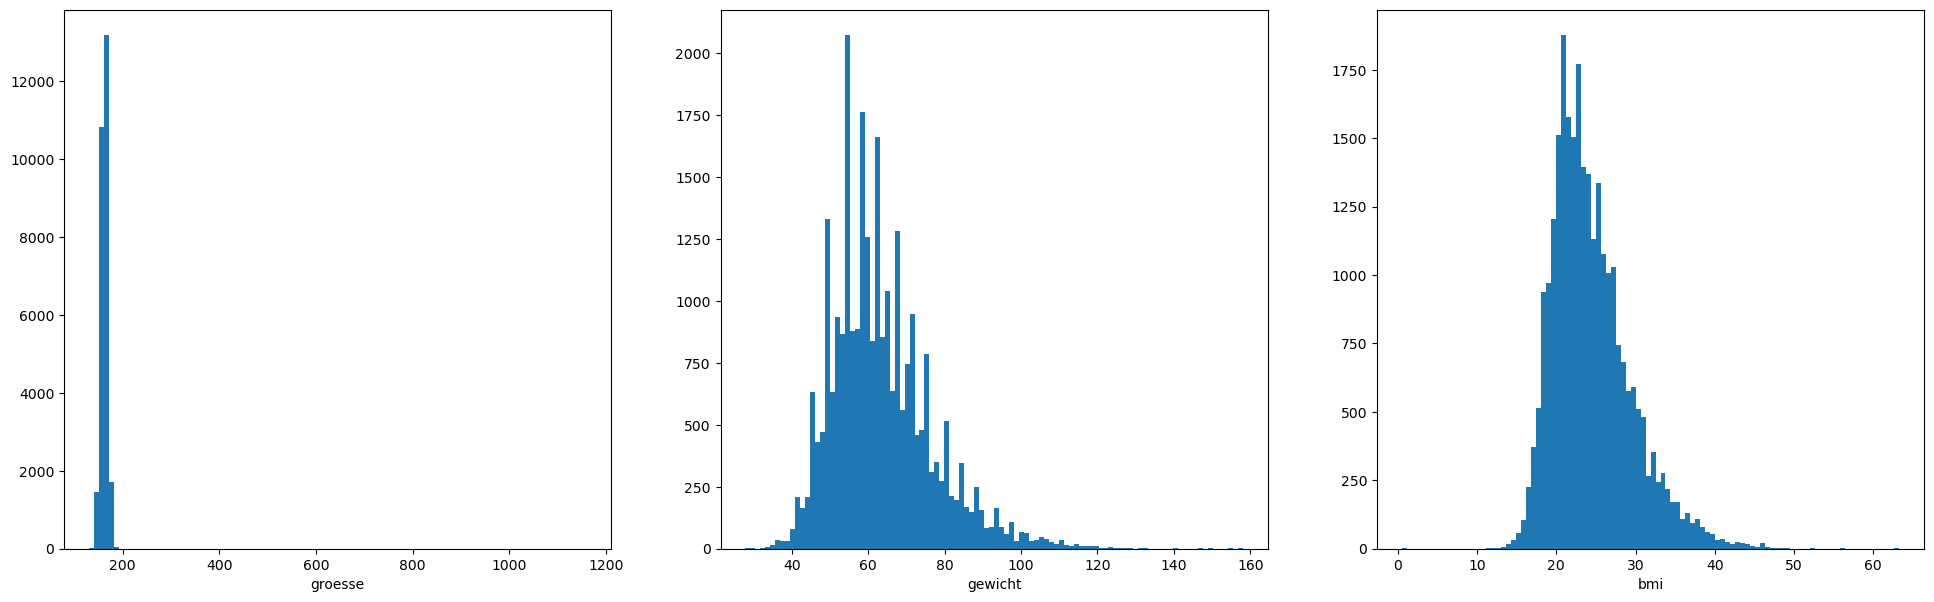

In [14]:
# Plot histograms of the relevant columns and check for outliers
fig, axs = plt.subplots(1, 3, figsize=(24,7))
for i, feature in enumerate(relevant_columns):
    axs[i].hist(df_anamnesis_female[feature], bins=100)
    axs[i].set_xlabel(feature)

It looks like we have some outliers for the height and maybe also weight columns

In [15]:
# Explore height outliers
df_anamnesis_female[df_anamnesis_female["groesse"] > 200]

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter
5060,7,1940,2021-08-24,1.0,0.0,0.0,1159.5,65.0,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,79.6


This value was most likely wrongly inputed. The correct value is most likely 159.5 cm.

In [16]:
df_anamnesis_female.loc[5060, "groesse"] = 159.5
df_anamnesis_female.loc[5060, "bmi"] = 65.0 / (1.595**2)
df_anamnesis_female.loc[5060, ["groesse", "gewicht", "bmi"]]

groesse        159.5
gewicht         65.0
bmi        25.550063
Name: 5060, dtype: object

In [17]:
# Explore weight outliers
df_anamnesis_female[df_anamnesis_female["gewicht"] > 150]

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter
27423,12,18039,2016-04-27,1.0,0.0,0.0,158.0,158.0,63.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,64.0
27949,25,18436,2018-11-16,1.0,0.0,0.0,NaN,155.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,65.4


The weight of these patients looks plausible, so we are not going to change it.

#### Impute missing values by patient history or gender specific median

In [18]:
# Calculate median of height and weight
height_median = df_anamnesis_female["groesse"].median()
weight_median = df_anamnesis_female["gewicht"].median()
print("Height median:", height_median)
print("Weight median:", weight_median)
medians = {"groesse": height_median, "gewicht": weight_median}

Height median: 161.0
Weight median: 61.0


In [19]:
def impute_by_closest_value(df, nan_idx):
    feature = df.columns[-1]
    smallest_time_diff = 20*365 # 20 years
    nearest_value = None
    
    df["Datum"] = pd.to_datetime(df["Datum"])
    nan_date = df.loc[nan_idx, "Datum"]
    df = df.drop(nan_idx)
    for _, row in df.iterrows():
        if pd.isna(row[feature]):
            continue
        else:
            time_diff = np.abs((nan_date - row["Datum"]).days)
            if time_diff < smallest_time_diff:
                smallest_time_diff = time_diff
                nearest_value = row[feature]
    return nearest_value

In [20]:
no_values_found = set()
imputed_by_history = set()

relevant_columns = np.array(["gewicht", "groesse"])
nan_mask = df_anamnesis_female[relevant_columns].isna().any(axis=1)
for idx in df_anamnesis_female[nan_mask].index:
    patient_id = df_anamnesis_female.loc[idx, "patientId"]
    patient_history = df_anamnesis_female[df_anamnesis_female["patientId"] == patient_id].sort_values(by="Datum")
    nan_columns = relevant_columns[df_anamnesis_female.loc[idx,relevant_columns].isna().values]
    
    # ------- IMPUTATION ------- #
    for feature in nan_columns:
        if len(patient_history[feature]) == patient_history[feature].isna().sum():
            # This means that that all values are None for this feature
            no_values_found.add(patient_id)
            df_anamnesis_female.loc[idx, feature] = medians[feature]
        else:
            # Impute with the closest non-NaN value
            df_anamnesis_female.loc[idx, feature] = impute_by_closest_value(patient_history[["Datum", feature]].copy(), idx)
            #patient_history[feature] = patient_history[feature].bfill().ffill()
            imputed_by_history.add(patient_id)
    df_anamnesis_female.loc[idx, "bmi"] = round(df_anamnesis_female.loc[idx, "gewicht"] / ((df_anamnesis_female.loc[idx, "groesse"] / 100)**2), 1)
    # ------- IMPUTATION ------- #
    
print("Number of patients with all values missing:", len(no_values_found))
print("Number of patients with available patient history:", len(imputed_by_history))

Number of patients with all values missing: 629
Number of patients with available patient history: 1303


In [21]:
print("Number of NaN's:", df_anamnesis_female.isna().sum().sum())

Number of NaN's: 0


In [22]:
df_anamnesis_female.to_csv("data/processed/anamnesis_female.csv", index=False)

## Impute missing values of medicaments dataframe

In some of the rows of the medicaments dataset, we have missing values for the medicament group name. These names were manually inputed by a doctor in a separate file called "Medikamente_ohne_Label.csv". We are going to use this file to impute the missing values.

In [23]:
# Load all of the medicaments that have a missing value in the "gruppe column"
df_medicaments_without_group_label = pd.read_csv("data/raw/Medikamente_ohne_Label.csv")

# Add rows where relevant group names were added by doctor.
df_medicaments = pd.concat([df_medicaments, df_medicaments_without_group_label], ignore_index=True)

# Remove all rows/medicaments without a group
df_medicaments = df_medicaments.dropna(subset=["gruppe"])
df_medicaments

,centerId,patientId,medikamentId,medikament,einzeldosis,einheit,intervall,beginnDatum,endDatum,gruppe
0,2,2992,691,bonviva i.v.,3,mg,3m,2013-09-15,NaN,bisphosphonat
1,2,2996,2410,ibandronat sandoz i.v.,3,mg,3m,2022-01-27,NaN,bisphosphonat
2,2,2998,690,bonviva 150 mg,150,mg,m,2011-09-30,2015-09-30,bisphosphonat
3,2,2998,2410,ibandronat sandoz i.v.,3,mg,3m,2018-11-01,NaN,bisphosphonat
4,2,3000,2060,fosamax wochentabletten,70,µg,w,2005-06-01,2012-04-30,bisphosphonat
...,...,...,...,...,...,...,...,...,...,...
19831,7,1846,5805,zometa 4 mg/5 ml,4,mg,3m,2015-01-01,NaN,Bisphosphonat
19832,7,1889,5805,zometa 4 mg/5 ml,4,mg,m,2017-11-15,2017-11-15,Bisphosphonat
19833,7,2328,5805,zometa 4 mg/5 ml,4,mg,m,2018-06-17,2018-06-17,Bisphosphonat
19834,7,2340,5805,zometa 4 mg/5 ml,4,mg,m,2018-03-07,2018-03-07,Bisphosphonat


In [24]:
# Keep only relevant columns
df_medicaments = df_medicaments[["patientId", "medikament", "beginnDatum", "endDatum", "gruppe"]]
display(df_medicaments)
df_medicaments.gruppe.unique()

,patientId,medikament,beginnDatum,endDatum,gruppe
0,2992,bonviva i.v.,2013-09-15,NaN,bisphosphonat
1,2996,ibandronat sandoz i.v.,2022-01-27,NaN,bisphosphonat
2,2998,bonviva 150 mg,2011-09-30,2015-09-30,bisphosphonat
3,2998,ibandronat sandoz i.v.,2018-11-01,NaN,bisphosphonat
4,3000,fosamax wochentabletten,2005-06-01,2012-04-30,bisphosphonat
...,...,...,...,...,...
19831,1846,zometa 4 mg/5 ml,2015-01-01,NaN,Bisphosphonat
19832,1889,zometa 4 mg/5 ml,2017-11-15,2017-11-15,Bisphosphonat
19833,2328,zometa 4 mg/5 ml,2018-06-17,2018-06-17,Bisphosphonat
19834,2340,zometa 4 mg/5 ml,2018-03-07,2018-03-07,Bisphosphonat


array(['bisphosphonat', 'prolia', 'forsteo', 'evista', 'HRT', 'SERM',
       'Romosozumab', 'Forsteo', 'Bisphosphonat'], dtype=object)

In [25]:
# Rename groups
group_names = {
    "bisphosphonat": "Bisphosphonat",
    "prolia": "Denosumab/Prolia",
    "forsteo": "Teriparatide/Forsteo",
    "evista": "SERM",
    "HRT": "HRT",
    "SERM": "SERM",
    "Romosozumab": "Romosozumab/Evenity", 
    "Forsteo": "Teriparatide/Forsteo",
    "Bisphosphonat": "Bisphosphonat"
}
df_medicaments = df_medicaments.replace({"gruppe": group_names})
df_medicaments.gruppe.unique()

array(['Bisphosphonat', 'Denosumab/Prolia', 'Teriparatide/Forsteo',
       'SERM', 'HRT', 'Romosozumab/Evenity'], dtype=object)

In [26]:
df_medicaments.isna().sum()

patientId         0
medikament        0
beginnDatum       0
endDatum       3308
gruppe            0
dtype: int64

In [27]:
df_medicaments.to_csv("data/processed/medicaments.csv", index=False)

We are now going to perform the feature engineering technique for the medicaments as described in my thesis. 

In [28]:
# Define new columns to be created
medicament_columns = [
    "Bisphosphonat_prior",
    "SERM_prior",
    "HRT_prior",
    "Denosumab_prior",
    "Romosozumab_prior",
    "Teriparatide_prior",
    "Bisphosphonat_current",
    "SERM_current",
    "HRT_current",
    "Denosumab_current",
    "Romosozumab_current",
    "Teriparatide_current",
    "Bisphosphonat_new",
    "SERM_new",
    "HRT_new",
    "Denosumab_new",
    "Romosozumab_new",
    "Teriparatide_new",
    "No_treatment"
]

In [29]:
BISPHOSPHONAT_DURATIONS = {
    "aclasta": 365,
    "actonel": 7,
    "alendron": 7,
    "alendron-mepha": 7,
    "alendronat": 7,
    "alendronat-acino": 7,
    "aredia": 91,
    "binosto": 7,
    "bonviva": 91,
    "fosamax": 7,
    "fosavance": 7,
    "i.v.": 91,
    "ibandronat": 91,
    "ibandronat-mepha": 91,
    "risedronat": 7,
    "zoledonat": 365,
    "zoledronat": 365,
    "zoledronat-acino": 365,
    "zoledronat-mepha": 365,
    "zometa": 365
}

In [31]:
def check_if_medicament_is_still_effective(medi, date):
    if medi["gruppe"] == "Denosumab":
        effective_days = 182  # 6 months
    elif medi["gruppe"] == "Bisphosphonat":
        effective_days = BISPHOSPHONAT_DURATIONS[medi["medikament"].split(" ")[0]]
    else:
        return False
    days_since_last_use = (date - medi["endDatum"]).days
    if days_since_last_use < effective_days:
        return True
    else:
        return False

In [32]:
from copy import deepcopy

# Add medicament data to dataframe
def find_medicaments(patient_id, date, df_medis, medicament_cols, new_therapy_buffer=3):
    new_therapy_buffer = datetime.timedelta(days=30*new_therapy_buffer)
    medicaments = deepcopy(df_medis[df_medis["patientId"] == patient_id])
    
    relevant_medicaments = medicaments[medicaments["beginnDatum"] < (date + new_therapy_buffer)]
    result = pd.Series(0, medicament_cols)
    result["No_treatment"] = 0
    
    if relevant_medicaments.empty:
        result["No_treatment"] = 1
        return result, date
    
    else:
        recorded_date = date
        for _, medi in relevant_medicaments.iterrows():
            start_date = medi["beginnDatum"]
            end_date = medi["endDatum"]
            if pd.isnull(end_date) or end_date > date:
                # Current treatment
                if (date - new_therapy_buffer) <= start_date <= (date + new_therapy_buffer):
                    # New treatment
                    recorded_date = medi["beginnDatum"]
                    name = medi["gruppe"].split("/")[0] + "_new"
                else:
                    name = medi["gruppe"].split("/")[0] + "_current"
                result[name] += 1
                continue
            else:
                # Prior treatment
                # Check whether the medicament has still an effect on the patient
                still_efective_treatment = check_if_medicament_is_still_effective(medi, date)
                if still_efective_treatment:
                    col_name = medi["gruppe"].split("/")[0] + "_current"
                else:
                    col_name = medi["gruppe"].split("/")[0] + "_prior"
                result[col_name] += 1
        return result, recorded_date

In [33]:
df_medicaments = pd.read_csv("data/processed/medicaments.csv", parse_dates=["beginnDatum", "endDatum"])
df_anamnesis_female = pd.read_csv("data/processed/anamnesis_female.csv", parse_dates=["Datum"])
df_pm_women = df_anamnesis_female[df_anamnesis_female["postmenopausal"] == 1].reset_index(drop=True)

# create copy of Datum column. The copy will be used for the merge with the densitometry data
df_pm_women["densito_date"] = df_pm_women["Datum"].copy(deep=True)

counter = 0
for idx, row in tqdm(df_pm_women.iterrows()):
    medis, date = find_medicaments(row["patientId"], row["Datum"], df_medicaments, medicament_columns)
    if date != row["Datum"]:
        counter += 1
    df_pm_women.loc[idx, "Datum"] = date
    df_pm_women.loc[idx, medicament_columns] = medis
df_pm_women

0it [00:00, ?it/s]

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter,densito_date,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,2018-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,8,1,2020-10-23,1.0,0.0,0.0,155.5,59.7,24.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,75.7,2020-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,2018-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8,3,2020-10-01,1.0,0.0,0.0,151.0,61.0,26.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,83.2,2020-10-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,2018-06-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981,2,20002,2022-06-03,1.0,0.0,0.0,154.0,62.0,26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.1,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26982,2,20003,2022-06-03,1.0,0.0,0.0,157.0,70.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
26983,2,20004,2022-06-03,1.0,0.0,0.0,163.5,54.0,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.4,2022-06-03,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26984,2,20006,2022-06-03,1.0,0.0,0.0,156.0,69.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,70.1,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [34]:
print(df_pm_women.loc[:,"Bisphosphonat_prior":].sum().sort_index())

Bisphosphonat_current     4480.0
Bisphosphonat_new         2753.0
Bisphosphonat_prior      11182.0
Denosumab_current         1445.0
Denosumab_new             1011.0
Denosumab_prior           3008.0
HRT_current                489.0
HRT_new                     62.0
HRT_prior                  166.0
No_treatment             13156.0
Romosozumab_current          8.0
Romosozumab_new             37.0
Romosozumab_prior           11.0
SERM_current               205.0
SERM_new                    94.0
SERM_prior                 444.0
Teriparatide_current       333.0
Teriparatide_new           270.0
Teriparatide_prior        1107.0
dtype: float64


## Impute missing values of fracture dataframe(s)

In [35]:
# Take a look at the dataframes at hand
df_verteb_fractures = pd.read_csv("data/raw/Vertebral_Frakturen.csv")
display(df_verteb_fractures)
print(df_verteb_fractures.isna().sum())
df_other_fractures = pd.read_csv("data/raw/Andere_Frakturen.csv")
display(df_other_fractures)
print(df_other_fractures.isna().sum())

,centerId,patientId,Wirbel,grad,jahr,monat,tag,kommentar
0,2,2992,L1,1.0,2013,0.0,0.0,NaN
1,2,3008,Th10,3.0,2022,4.0,5.0,NaN
2,2,3012,Th7,3.0,2007,0.0,0.0,NaN
3,2,3012,L5,1.0,2019,0.0,0.0,NaN
4,2,3014,L4,-1.0,2016,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...
5929,28,19332,?,1.0,2020,0.0,0.0,???
5930,28,19333,?,1.0,2021,0.0,0.0,???
5931,28,19340,?,1.0,2021,0.0,0.0,???
5932,28,19341,?,1.0,2021,0.0,0.0,???


centerId        0
patientId       0
Wirbel          0
grad          328
jahr            0
monat         273
tag           426
kommentar    4902
dtype: int64


,centerId,patientId,frakturTyp,seite,xray,jahr,monat,tag,kommentar
0,2,2992,Pelvis,NaN,1.0,2013,0.0,0.0,NaN
1,2,2996,Schenkelhals,left,1.0,2021,5.0,15.0,NaN
2,2,2998,Rippen,NaN,1.0,2009,0.0,0.0,NaN
3,2,3000,Radius,NaN,1.0,2009,0.0,0.0,NaN
4,2,3001,Sacrum,NaN,1.0,2012,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...
8445,28,19943,Schenkelhals,left,1.0,2022,5.0,4.0,NaN
8446,28,19952,Schenkelhals,right,1.0,2022,5.0,23.0,NaN
8447,28,19953,Femur,right,1.0,2022,5.0,21.0,NaN
8448,28,20001,Schenkelhals,left,1.0,2022,6.0,1.0,NaN


centerId         0
patientId        0
frakturTyp       0
seite         6989
xray          3092
jahr             0
monat          446
tag            681
kommentar     6170
dtype: int64


In [36]:
# merge the two fracture tables
df_other_fractures = df_other_fractures.drop("xray", axis=1)
df_fractures = pd.concat([df_verteb_fractures, df_other_fractures])
df_fractures = df_fractures.drop("kommentar", axis=1)
df_fractures = df_fractures.sort_values(by=["patientId", "jahr", "monat", "tag"]).reset_index(drop=True)
df_fractures

,centerId,patientId,Wirbel,grad,jahr,monat,tag,frakturTyp,seite
0,8,3,NaN,NaN,2017,0.0,0.0,Radius,NaN
1,8,4,NaN,NaN,2017,0.0,0.0,Rippen,NaN
2,8,5,?,1.0,2017,0.0,0.0,NaN,NaN
3,8,5,NaN,NaN,2017,0.0,0.0,Schenkelhals,NaN
4,8,5,NaN,NaN,2017,0.0,0.0,Pelvis,NaN
...,...,...,...,...,...,...,...,...,...
14379,2,20002,NaN,NaN,2022,4.0,NaN,Metatarsale,left
14380,2,20003,L4,NaN,2021,7.0,22.0,NaN,NaN
14381,2,20004,NaN,NaN,2020,5.0,NaN,Radius,right
14382,2,20006,NaN,NaN,2021,10.0,31.0,oberes Sprunggelenk,left


In [37]:
# transform columns jahr, monat and tag into one date column

def add_date_to_df(row):
    try:
        year = int(row["jahr"])
        month = int(row["monat"])
        # if month or day is 0/NaN, set it to 1
        if month == 0:
            month = 1
        day = int(row["tag"])
        if day == 0:
            day = 1
        row["Datum"] = datetime.date(year, month, day)
        return row
    except ValueError as e:
        print(e)
        print(row)
        row["Datum"] = None
        return row

df_fractures[["monat", "tag"]] = df_fractures[["monat", "tag"]].fillna(0)
df_fractures = df_fractures.apply(lambda row: add_date_to_df(row), axis=1)
df_fractures

,centerId,patientId,Wirbel,grad,jahr,monat,tag,frakturTyp,seite,Datum
0,8,3,NaN,NaN,2017,0.0,0.0,Radius,NaN,2017-01-01
1,8,4,NaN,NaN,2017,0.0,0.0,Rippen,NaN,2017-01-01
2,8,5,?,1.0,2017,0.0,0.0,NaN,NaN,2017-01-01
3,8,5,NaN,NaN,2017,0.0,0.0,Schenkelhals,NaN,2017-01-01
4,8,5,NaN,NaN,2017,0.0,0.0,Pelvis,NaN,2017-01-01
...,...,...,...,...,...,...,...,...,...,...
14379,2,20002,NaN,NaN,2022,4.0,0.0,Metatarsale,left,2022-04-01
14380,2,20003,L4,NaN,2021,7.0,22.0,NaN,NaN,2021-07-22
14381,2,20004,NaN,NaN,2020,5.0,0.0,Radius,right,2020-05-01
14382,2,20006,NaN,NaN,2021,10.0,31.0,oberes Sprunggelenk,left,2021-10-31


In [38]:
def add_fracture_columns(row):
    if type(row["Wirbel"]) == str:
        row["vertebral_fracture"] = 1
        row["hip_fracture"] = 0
        row["wrist_fracture"] = 0
    else:
        row["vertebral_fracture"] = 0
        if row["frakturTyp"] in ["Schenkelhals", "Pelvis", "Femur"]:
            row["hip_fracture"] = 1
            row["wrist_fracture"] = 0
        elif row["frakturTyp"] == "Radius":
            row["hip_fracture"] = 0
            row["wrist_fracture"] = 1
        else:
            row["hip_fracture"] = 0
            row["wrist_fracture"] = 0
    row["any_fracture"] = 1
    return row

In [39]:
df_fractures = df_fractures.apply(lambda row: add_fracture_columns(row), axis=1)
df_fractures

,centerId,patientId,Wirbel,grad,jahr,monat,tag,frakturTyp,seite,Datum,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture
0,8,3,NaN,NaN,2017,0.0,0.0,Radius,NaN,2017-01-01,0,0,1,1
1,8,4,NaN,NaN,2017,0.0,0.0,Rippen,NaN,2017-01-01,0,0,0,1
2,8,5,?,1.0,2017,0.0,0.0,NaN,NaN,2017-01-01,1,0,0,1
3,8,5,NaN,NaN,2017,0.0,0.0,Schenkelhals,NaN,2017-01-01,0,1,0,1
4,8,5,NaN,NaN,2017,0.0,0.0,Pelvis,NaN,2017-01-01,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,2,20002,NaN,NaN,2022,4.0,0.0,Metatarsale,left,2022-04-01,0,0,0,1
14380,2,20003,L4,NaN,2021,7.0,22.0,NaN,NaN,2021-07-22,1,0,0,1
14381,2,20004,NaN,NaN,2020,5.0,0.0,Radius,right,2020-05-01,0,0,1,1
14382,2,20006,NaN,NaN,2021,10.0,31.0,oberes Sprunggelenk,left,2021-10-31,0,0,0,1


In [40]:
df_fractures_processed = df_fractures[["patientId", "Datum", "vertebral_fracture", "hip_fracture", "wrist_fracture", "any_fracture"]]
df_fractures_processed.isna().sum()

patientId             0
Datum                 0
vertebral_fracture    0
hip_fracture          0
wrist_fracture        0
any_fracture          0
dtype: int64

In [41]:
# Extract all relevant fractures (postmenopausal women)
pm_women = df_pm_women.patientId.unique()
df_fractures_pm = df_fractures_processed[df_fractures_processed["patientId"].isin(pm_women)].sort_values(["patientId", "Datum"])
df_fractures_pm.reset_index(drop=True, inplace=True)
df_fractures_pm

,patientId,Datum,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture
0,3,2017-01-01,0,0,1,1
1,4,2017-01-01,0,0,0,1
2,5,2017-01-01,1,0,0,1
3,5,2017-01-01,0,1,0,1
4,5,2017-01-01,0,1,0,1
...,...,...,...,...,...,...
11801,20002,2022-04-01,0,0,0,1
11802,20003,2021-07-22,1,0,0,1
11803,20004,2020-05-01,0,0,1,1
11804,20006,2021-10-31,0,0,0,1


In [42]:
df_fractures_pm.to_csv("data/processed/fractures_pm.csv", index=False)

Now we are going to calculate the minimum time to event for each fracture type and each patient and then merge the dataframes.

In [43]:
# Reload saved dataframes to ensure datetime columns are parsed correctly
df_fractures_pm = pd.read_csv("data/processed/fractures_pm.csv", parse_dates=["Datum"])

In [44]:
def get_time_to_event(visit, fractures, fracture_columns, months_till_last_visit, right_censored_cols):
    time_to_events = pd.Series(months_till_last_visit, index=fracture_columns)
    time_to_events = pd.concat([time_to_events, pd.Series(1, right_censored_cols)])
    for frac_col in fracture_columns:
        for frac_idx in fractures.index:
            if fractures.loc[frac_idx, frac_col] > 0:
                time_to_event = round((fractures.loc[frac_idx, "Datum"] - visit["Datum"]).days / 30.5, 3)
                time_to_events[frac_col] = time_to_event
                fracture_type = frac_col.split("_")[0]
                time_to_events[f"{fracture_type}_right_censored"] = 0
                break
    
    # Set right censored time-to-events to last observed fracture (or last visit as initialized)
    right_censored = time_to_events[right_censored_cols]
    right_censored = [e.split("_")[0] for e in right_censored[right_censored[right_censored_cols] == 1].index]
    for fracture_type in right_censored:
        time_to_events[f"{fracture_type}_fracture"] = max(time_to_events["vertebral_fracture":"any_fracture"])
    
    return time_to_events

In [45]:
# merge the anamnesis and fractures dataframes by going through the 
# anamnesis dataframe and adding the fractures the minimum time-to-event
# for each fracture type

fracture_columns = ["vertebral_fracture", "hip_fracture", "wrist_fracture", "any_fracture"]
right_censored_cols = ["vertebral_right_censored", "hip_right_censored", "wrist_right_censored", "any_right_censored"]
time_to_event_columns = fracture_columns + right_censored_cols

late_fractures = []
for idx, row in df_pm_women.iterrows():
    patient_id = row["patientId"]
    # Get duration between first and last visit in months
    # if patient has not had a follow-up visit, set months_till_last_visit to 0
    last_visit = df_pm_women[df_pm_women["patientId"] == patient_id].iloc[-1]["Datum"]
    months_till_last_visit = round((last_visit - row["Datum"]).days / 30.5, 3)
    
    anamnesis_date = row["Datum"]
    fractures = df_fractures_pm[df_fractures_pm["patientId"] == patient_id]
    new_fractures = fractures[fractures["Datum"] > anamnesis_date]
    if new_fractures.empty:
        df_pm_women.loc[idx, fracture_columns] = months_till_last_visit
        df_pm_women.loc[idx, right_censored_cols] = 1
    else:
        time_to_events = get_time_to_event(row, new_fractures, fracture_columns, months_till_last_visit, right_censored_cols)
        df_pm_women.loc[idx, time_to_event_columns] = time_to_events
        
    if months_till_last_visit == 0 and df_pm_women.loc[idx, fracture_columns].sum() > 0:
        late_fractures.append(patient_id)
    
    old_fractures = fractures[fractures["Datum"] <= anamnesis_date]
    if old_fractures.empty:
        df_pm_women.loc[idx, ["recent_fracture", "previous_fracture"]] = 0
    else:
        recent_fractures = fractures[fractures["Datum"].between(anamnesis_date - datetime.timedelta(days=2*365), anamnesis_date)]["any_fracture"].sum()
        previous_fractures = fractures[fractures["Datum"] < anamnesis_date]["any_fracture"].sum()
        df_pm_women.loc[idx, "recent_fracture"] = recent_fractures
        df_pm_women.loc[idx, "previous_fracture"] = previous_fractures

print(late_fractures)
df_pm_women

[24, 57, 74, 671, 807, 813, 885, 1259, 1428, 1708, 2460, 2677, 2773, 2800, 3546, 3619, 4000, 4237, 4242, 4267, 4555, 4613, 4619, 4723, 5070, 5172, 5420, 5759, 6316, 6355, 6364, 6855, 6907, 7192, 7911, 8065, 8240, 8458, 8502, 8529, 8651, 8654, 8746, 8864, 9170, 9189, 9803, 9965, 10176, 10394, 10700, 10943, 11309, 11338, 11715, 12899, 12899, 12908, 13614, 15591, 16524, 17834, 18320, 18363, 19072, 19251, 19446, 19583]


,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter,densito_date,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,2018-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.689,28.689,28.689,28.689,1.0,1.0,1.0,1.0,0.0,0.0
1,8,1,2020-10-23,1.0,0.0,0.0,155.5,59.7,24.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,75.7,2020-10-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0,1.0,0.0,0.0
2,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,2018-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.574,27.574,27.574,27.574,1.0,1.0,1.0,1.0,1.0,1.0
3,8,3,2020-10-01,1.0,0.0,0.0,151.0,61.0,26.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,83.2,2020-10-01,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0,1.0,0.0,1.0
4,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,2018-06-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.164,28.164,28.164,28.164,1.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26981,2,20002,2022-06-03,1.0,0.0,0.0,154.0,62.0,26.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.1,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0,1.0,1.0,1.0
26982,2,20003,2022-06-03,1.0,0.0,0.0,157.0,70.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0,1.0,1.0,1.0
26983,2,20004,2022-06-03,1.0,0.0,0.0,163.5,54.0,20.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.4,2022-06-03,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.000,0.000,1.0,1.0,1.0,1.0,0.0,1.0
26984,2,20006,2022-06-03,1.0,0.0,0.0,156.0,69.0,28.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,70.1,2022-06-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [46]:
df_followups = df_pm_women.drop(df_pm_women[df_pm_women["any_fracture"] == 0].index)
df_followups = df_followups.reset_index(drop=True)
df_followups

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter,densito_date,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,2018-06-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.689,28.689,28.689,28.689,1.0,1.0,1.0,1.0,0.0,0.0
1,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,2018-06-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.574,27.574,27.574,27.574,1.0,1.0,1.0,1.0,1.0,1.0
2,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,2018-06-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.164,28.164,28.164,28.164,1.0,1.0,1.0,1.0,1.0,1.0
3,8,5,2018-06-22,1.0,0.0,0.0,150.0,40.9,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.2,2018-06-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.197,28.197,28.197,6.328,1.0,1.0,1.0,0.0,3.0,3.0
4,8,6,2018-06-27,1.0,0.0,0.0,165.5,74.7,27.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,59.3,2018-06-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.279,25.279,25.279,25.279,1.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,2,19583,2022-04-19,1.0,0.0,0.0,149.0,68.0,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,84.2,2022-04-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033,0.033,0.033,0.033,0.0,1.0,1.0,0.0,2.0,2.0
11622,2,19590,2020-01-15,1.0,0.0,0.0,151.0,79.0,34.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,2020-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.049,27.049,27.049,27.049,1.0,1.0,1.0,1.0,1.0,3.0
11623,2,19654,2020-02-13,1.0,0.0,0.0,156.5,73.0,29.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.1,2020-02-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,26.295,26.295,26.295,26.295,1.0,1.0,1.0,1.0,0.0,0.0
11624,2,19708,2014-09-17,1.0,0.0,1.0,168.0,71.0,25.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,45.2,2014-09-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

## Impute missing values of Densitometry dataframe

In [90]:
# Take a look at the dataframe at hand
display(df_densitometry)
display(df_densitometry[["tscore", "tbs"]].describe().T)
df_densitometry[["tscore", "tbs"]].isna().sum()

,centerId,patientId,Datum,messort,seite,tscore,tbs
0,8,1,2018-06-01,lws,NaN,-1.0,1.470
1,8,1,2018-06-01,neck,left,-1.8,NaN
2,8,1,2018-06-01,totalHip,left,-1.2,NaN
3,8,1,2020-10-23,lws,NaN,-0.8,1.408
4,8,1,2020-10-23,neck,left,-2.1,NaN
...,...,...,...,...,...,...,...
146381,28,20008,2022-06-14,lws,NaN,-3.6,1.141
146382,28,20008,2022-06-14,neck,left,-2.5,NaN
146383,28,20008,2022-06-14,radius,right,-2.7,NaN
146384,28,20008,2022-06-14,radiusUlna,right,-2.8,NaN


,count,mean,std,min,25%,50%,75%,max
tscore,146369.0,-1.506715,1.157257,-28.0,-2.200,-1.600,-0.900,9.40
tbs,26859.0,1.252231,0.272679,-6.9,1.187,1.267,1.344,1.96


tscore        17
tbs       119527
dtype: int64

In [91]:
# Extract only the tscores/tbs of the postmenopausal women
pm_women = df_followups["patientId"].unique().tolist()
df_densitometry_pm_women = df_densitometry[df_densitometry["patientId"].isin(pm_women)].sort_values(["patientId", "Datum"])
df_densitometry_pm_women.reset_index(drop=True, inplace=True)
df_densitometry_pm_women

,centerId,patientId,Datum,messort,seite,tscore,tbs
0,8,1,2018-06-01,lws,NaN,-1.0,1.470
1,8,1,2018-06-01,neck,left,-1.8,NaN
2,8,1,2018-06-01,totalHip,left,-1.2,NaN
3,8,1,2020-10-23,lws,NaN,-0.8,1.408
4,8,1,2020-10-23,neck,left,-2.1,NaN
...,...,...,...,...,...,...,...
77232,2,19917,2022-05-23,lws,NaN,-3.2,1.146
77233,2,19917,2022-05-23,neck,left,-3.3,NaN
77234,2,19917,2022-05-23,neck,right,-2.7,NaN
77235,2,19917,2022-05-23,totalHip,left,-2.4,NaN


Currently, each BMD measurement at a separate location is a separete row. We want to have one row per patient with all BMD measurements of the same day in one row.

In [92]:
import math

def add_new_visit(df, patient):
    df_new_visit = pd.DataFrame(columns=["patientId", "densito_date", "tscore_lws", "tscore_neck", "tscore_radius", "tscore_radiusUlna", "tscore_totalHip", "tbs_lws"])
    df_new_visit.loc[0, "patientId"] = patient["patientId"]
    df_new_visit.loc[0, "densito_date"] = patient["Datum"]
    df_new_visit.loc[0, "tscore_" + patient["messort"]] = patient["tscore"]
    df_new_visit.loc[0, "tbs_lws"] = patient["tbs"]
    return pd.concat([df, df_new_visit], ignore_index=True)


def add_new_measurement_to_visit(df, measurement):
    visit_idx = len(df)-1
    if math.isnan(df.loc[visit_idx, "tscore_" + measurement["messort"]]):
        df.loc[visit_idx, "tscore_" + measurement["messort"]] = measurement["tscore"]
    else:
        df.loc[visit_idx, "tscore_" + measurement["messort"]] = min(df.loc[visit_idx, "tscore_" + measurement["messort"]], measurement["tscore"])
    return df

In [93]:
# Restructure dataframe such that each measurement location has its own column.
# If measurements for both sides (left and right) are provided, the smaller measurement is taken.

df_densitometry_expanded = pd.DataFrame(columns=["patientId", "densito_date", "tscore_lws", "tscore_neck", "tscore_radius", "tscore_radiusUlna", "tscore_totalHip", "tbs_lws"])
df_densitometry_expanded = add_new_visit(df_densitometry_expanded, df_densitometry_pm_women.iloc[0,:])
current_visit_idx = 0
for _, row in df_densitometry_pm_women.iloc[1:,:].iterrows():
    if df_densitometry_expanded.loc[current_visit_idx,"patientId"] == row.loc["patientId"] and df_densitometry_expanded.loc[current_visit_idx,"densito_date"] == row["Datum"]:
        df_densitometry_expanded = add_new_measurement_to_visit(df_densitometry_expanded, row)
    else:
        df_densitometry_expanded = add_new_visit(df_densitometry_expanded, row)
        current_visit_idx += 1
        
df_densitometry_expanded

,patientId,densito_date,tscore_lws,tscore_neck,tscore_radius,tscore_radiusUlna,tscore_totalHip,tbs_lws
0,1,2018-06-01,-1.0,-1.8,NaN,NaN,-1.2,1.47
1,1,2020-10-23,-0.8,-2.1,NaN,NaN,-1.3,1.408
2,3,2018-06-13,-2.6,-2.3,-3.0,-3.4,-2.0,1.169
3,3,2020-10-01,-2.3,-2.2,-3.1,-3.6,-1.8,1.185
4,4,2018-06-22,-3.8,-3.2,NaN,NaN,-3.1,1.29
...,...,...,...,...,...,...,...,...
17308,19654,2022-04-25,-2.9,-1.6,NaN,NaN,-0.6,1.289
17309,19708,2014-09-17,-0.5,-1.6,NaN,NaN,-1.0,1.168
17310,19708,2022-04-29,-0.5,-1.6,NaN,NaN,-1.0,1.238
17311,19917,2020-06-25,-3.0,-2.7,NaN,NaN,-2.5,1.251


In [94]:
float_columns = ["tscore_lws", "tscore_neck", "tscore_radius", "tscore_radiusUlna", "tscore_totalHip", "tbs_lws"]
df_densitometry_expanded[float_columns] = df_densitometry_expanded[float_columns].astype(float)

df_stats, nans = calculate_stats(df_densitometry_expanded)
df_stats

,mean,50%,min,25%,75%,max,Total(%)
patientId,NaN,NaN,NaN,NaN,NaN,NaN,100.00
densito_date,NaN,NaN,NaN,NaN,NaN,NaN,100.00
tscore_lws,-1.832076,-2.0,-7.1,-2.7,-1.2,7.3,95.65
tscore_neck,-1.912651,-2.0,-6.0,-2.4,-1.5,4.9,95.38
tscore_radius,-2.279921,-2.3,-6.9,-3.2,-1.4,4.6,17.63
tscore_radiusUlna,-2.830922,-2.9,-6.7,-3.9,-1.9,2.5,9.72
tscore_totalHip,-1.657956,-1.7,-6.2,-2.2,-1.1,3.0,94.09
tbs_lws,1.237243,1.246,-4.4,1.173,1.314,1.96,75.84


In [95]:
# Replace negative TBS values with NaN
negative_tbs_index = df_densitometry_expanded[df_densitometry_expanded["tbs_lws"] < 0].index
df_densitometry_expanded.loc[negative_tbs_index, "tbs_lws"] = np.nan

#### Train XGBoost model to impute missing BMD values

To ensure that we don't have any data leakage between the train and test set, we need to do the train-test split now. Then we can train the XGBoost model on the train set and impute the missing values of the test set.

In [96]:
from sklearn.model_selection import train_test_split

# Add num_visits to dataframe for stratifying
num_visits = df_followups.groupby("patientId").count()["Datum"]
for i in df_followups.index:
    df_followups.loc[i,"num_visits"] = num_visits[df_followups.loc[i, "patientId"]]

train_test_seed = 42
df_train, df_test = train_test_split(df_followups, test_size=0.2, random_state=train_test_seed, stratify=df_followups[["any_right_censored", "num_visits"]])
train_ids = df_train["patientId"].unique().tolist()
test_ids = df_test["patientId"].unique().tolist()

In [97]:
# Filter for all rows that have at least one NaN in one of the columns [lws, neck, totalHip, tbs]
nan_rows = df_densitometry_expanded[df_densitometry_expanded[["tscore_lws", "tscore_neck", "tscore_totalHip", "tbs_lws"]].isna().any(axis=1)]
nan_rows = nan_rows.drop(["tscore_radius", "tscore_radiusUlna"], axis=1)

# Create train set for XGBoost Imputation
df_train_imputer = df_densitometry_expanded[df_densitometry_expanded["patientId"].isin(train_ids)]
df_train_imputer = df_train_imputer[["tscore_lws", "tscore_neck", "tscore_totalHip", "tbs_lws"]].dropna().astype(float)
display(df_train_imputer)
df_train_imputer.isna().sum()

,tscore_lws,tscore_neck,tscore_totalHip,tbs_lws
0,-1.0,-1.8,-1.2,1.470
1,-0.8,-2.1,-1.3,1.408
4,-3.8,-3.2,-3.1,1.290
5,-3.4,-3.7,-3.4,1.284
8,-2.5,-1.3,-0.9,1.295
...,...,...,...,...
17306,-2.0,-2.8,-2.1,1.196
17307,-2.8,-1.4,-0.5,1.340
17308,-2.9,-1.6,-0.6,1.289
17311,-3.0,-2.7,-2.5,1.251


tscore_lws         0
tscore_neck        0
tscore_totalHip    0
tbs_lws            0
dtype: int64

Features: ['tscore_neck', 'tscore_totalHip', 'tbs_lws']
Target: tscore_lws
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RMSE: 1.1102361232179399
{'max_depth': 2, 'n_estimators': 20}

Features: ['tscore_lws', 'tscore_totalHip', 'tbs_lws']
Target: tscore_neck
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RMSE: 0.41238324963122286
{'max_depth': 3, 'n_estimators': 20}

Features: ['tscore_lws', 'tscore_neck', 'tbs_lws']
Target: tscore_totalHip
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RMSE: 0.4485737524782179
{'max_depth': 2, 'n_estimators': 30}

Features: ['tscore_lws', 'tscore_neck', 'tscore_totalHip']
Target: tbs_lws
Fitting 5 folds for each of 20 candidates, totalling 100 fits
RMSE: 0.10740475883980236
{'max_depth': 2, 'n_estimators': 20}



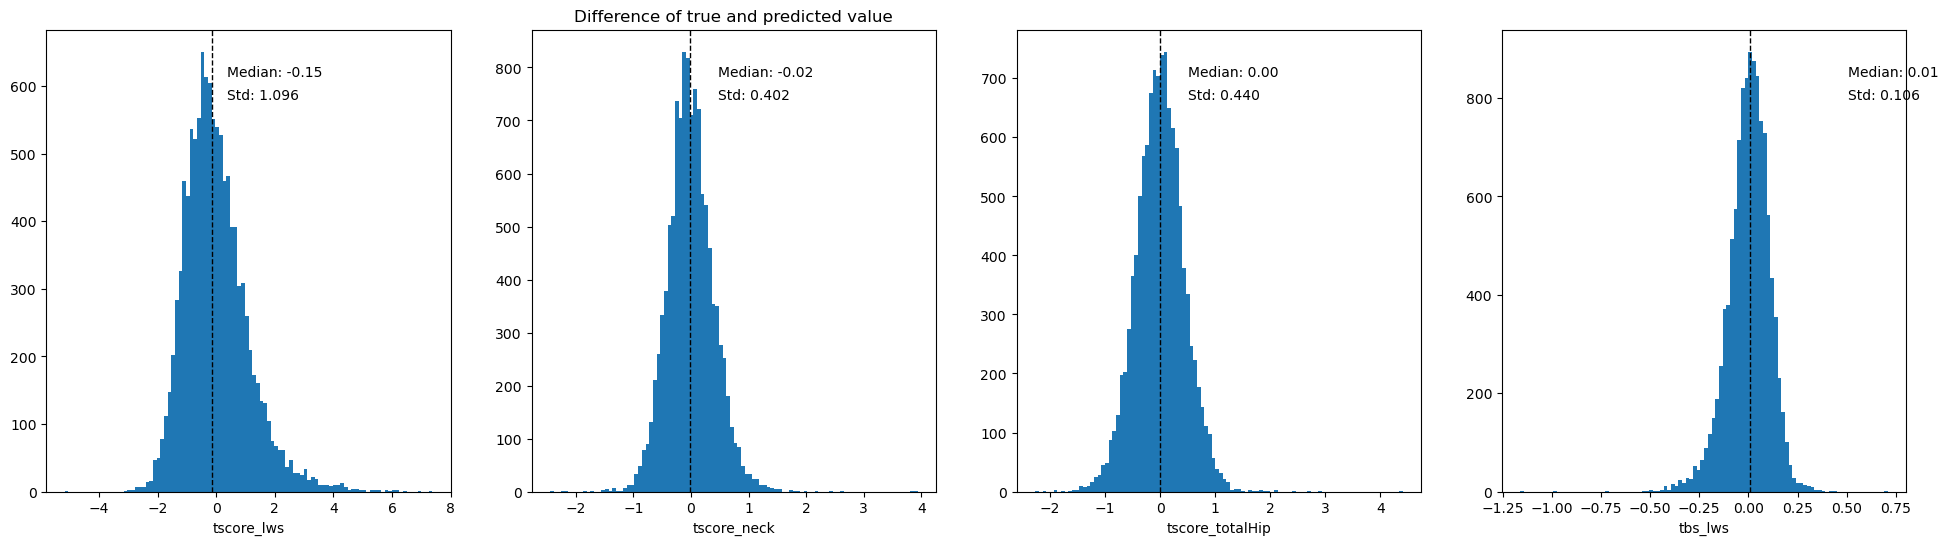

In [98]:
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
import multiprocessing

fig, axs = plt.subplots(1, 4, figsize=(24,6))
axs[1].set_title("Difference of true and predicted value")

trained_models = {}
differences_xgb = {}
for i in range(4):
    tscores = ["tscore_lws", "tscore_neck", "tscore_totalHip", "tbs_lws"]
    target = tscores.pop(i)
    features = tscores
    print("Features:", features)
    print("Target:", target)
    
    X = df_train_imputer[features]
    y = df_train_imputer[target]

    xgb_model = xgb.XGBRegressor(n_jobs=multiprocessing.cpu_count() // 2)
    xgb_regr = GridSearchCV(
        xgb_model,
        param_grid={'max_depth': [1, 2, 3, 4], 'n_estimators': [10, 20, 30, 40, 50]}, 
        cv=5,
        scoring="neg_root_mean_squared_error",
        verbose=1, 
        n_jobs=2
    )
    xgb_regr.fit(X, y)
    print("RMSE:", -xgb_regr.best_score_)
    print(xgb_regr.best_params_)
    print()
    
    differences = (y - xgb_regr.best_estimator_.predict(X))
    axs[i].hist(differences, bins=100)
    axs[i].set_xlabel(target)
    axs[i].axvline(differences.median(), color='k', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = axs[i].get_ylim()
    axs[i].text(differences.median()+0.5, max_ylim*0.9, 'Median: {:.2f}'.format(differences.median()))
    axs[i].text(differences.median()+0.5, max_ylim*0.85, 'Std: {:.3f}'.format(differences.std()))
    
    trained_models[target] = xgb_regr.best_estimator_
    differences_xgb[target] = differences

In [99]:
from sklearn.metrics import mean_squared_error


# Calculate mean performance to compare against XGBoost imputation
for i in range(4):
    tscores = ["tscore_lws", "tscore_neck", "tscore_totalHip", "tbs_lws"]
    target = tscores.pop(i)
    features = tscores
    print("Features:", features)
    print("Target:", target)
    
    X = df_train_imputer[features]
    y = df_train_imputer[target]
    mean_value = y.mean()

    print("Mean RMSE:", mean_squared_error(y, [mean_value] * len(y), squared=False))
    print()

Features: ['tscore_neck', 'tscore_totalHip', 'tbs_lws']
Target: tscore_lws
Mean RMSE: 1.2537324220543622

Features: ['tscore_lws', 'tscore_totalHip', 'tbs_lws']
Target: tscore_neck
Mean RMSE: 0.7575656438162043

Features: ['tscore_lws', 'tscore_neck', 'tbs_lws']
Target: tscore_totalHip
Mean RMSE: 0.8513925405242091

Features: ['tscore_lws', 'tscore_neck', 'tscore_totalHip']
Target: tbs_lws
Mean RMSE: 0.11276653585581267



XGBoost performance beats mean imputation in all four cases.

In [100]:
# add new imputation columns
df_densitometry_v3 = deepcopy(df_densitometry_expanded).drop(["tscore_radius", "tscore_radiusUlna"], axis=1)
relevant_tscores = np.array(["tscore_lws", "tscore_neck", "tscore_totalHip", "tbs_lws"])
for tscore in relevant_tscores:
    df_densitometry_v3[f"{tscore}_imputed"] = 0
df_densitometry_v3[relevant_tscores] = df_densitometry_v3[relevant_tscores].astype(float)
df_densitometry_v3

,patientId,densito_date,tscore_lws,tscore_neck,tscore_totalHip,tbs_lws,tscore_lws_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_lws_imputed
0,1,2018-06-01,-1.0,-1.8,-1.2,1.470,0,0,0,0
1,1,2020-10-23,-0.8,-2.1,-1.3,1.408,0,0,0,0
2,3,2018-06-13,-2.6,-2.3,-2.0,1.169,0,0,0,0
3,3,2020-10-01,-2.3,-2.2,-1.8,1.185,0,0,0,0
4,4,2018-06-22,-3.8,-3.2,-3.1,1.290,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17308,19654,2022-04-25,-2.9,-1.6,-0.6,1.289,0,0,0,0
17309,19708,2014-09-17,-0.5,-1.6,-1.0,1.168,0,0,0,0
17310,19708,2022-04-29,-0.5,-1.6,-1.0,1.238,0,0,0,0
17311,19917,2020-06-25,-3.0,-2.7,-2.5,1.251,0,0,0,0


In [101]:
X_not_imputed = nan_rows[relevant_tscores].astype(float)
for idx, row in X_not_imputed.iterrows():
    if row.isna().sum() >= 3:
        for nan_ts_location in relevant_tscores[row.isna()]:
            df_densitometry_v3.loc[idx, nan_ts_location] = df_train_imputer.loc[:, nan_ts_location].mean()
            df_densitometry_v3.loc[idx, f"{nan_ts_location}_imputed"] = 1
    else:
        for nan_ts_location in relevant_tscores[row.isna()]:
            if nan_ts_location in ["tscore_neck", "tscore_totalHip"] and X_not_imputed.loc[idx, ["tscore_neck", "tscore_totalHip"]].isna().all():
                df_densitometry_v3.loc[idx, nan_ts_location] = df_train_imputer.loc[:, nan_ts_location].mean()
            else:
                X = X_not_imputed.drop(nan_ts_location, axis=1)
                model = trained_models[nan_ts_location]
                df_densitometry_v3.loc[idx, nan_ts_location] = round(model.predict(X.loc[idx:idx+1,:])[0], 1)
            df_densitometry_v3.loc[idx, f"{nan_ts_location}_imputed"] = 1
df_densitometry_v3

,patientId,densito_date,tscore_lws,tscore_neck,tscore_totalHip,tbs_lws,tscore_lws_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_lws_imputed
0,1,2018-06-01,-1.0,-1.8,-1.2,1.470,0,0,0,0
1,1,2020-10-23,-0.8,-2.1,-1.3,1.408,0,0,0,0
2,3,2018-06-13,-2.6,-2.3,-2.0,1.169,0,0,0,0
3,3,2020-10-01,-2.3,-2.2,-1.8,1.185,0,0,0,0
4,4,2018-06-22,-3.8,-3.2,-3.1,1.290,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
17308,19654,2022-04-25,-2.9,-1.6,-0.6,1.289,0,0,0,0
17309,19708,2014-09-17,-0.5,-1.6,-1.0,1.168,0,0,0,0
17310,19708,2022-04-29,-0.5,-1.6,-1.0,1.238,0,0,0,0
17311,19917,2020-06-25,-3.0,-2.7,-2.5,1.251,0,0,0,0


In [102]:
# Print number of imputed values
df_densitometry_v3[["tscore_lws_imputed", "tscore_neck_imputed", "tscore_totalHip_imputed", "tbs_lws_imputed"]].sum()

tscore_lws_imputed          753
tscore_neck_imputed         800
tscore_totalHip_imputed    1024
tbs_lws_imputed            4193
dtype: int64

<AxesSubplot:title={'center':'tbs_lws'}, ylabel='Frequency'>

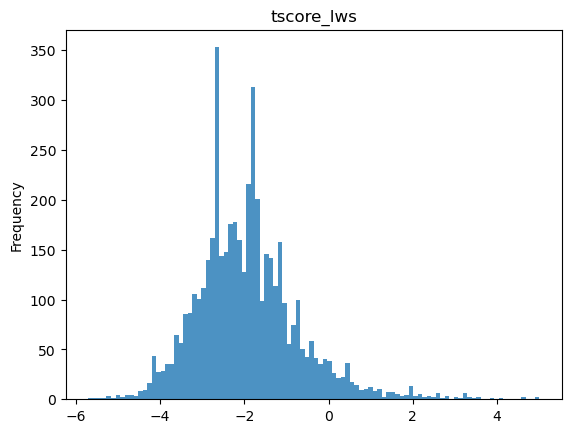

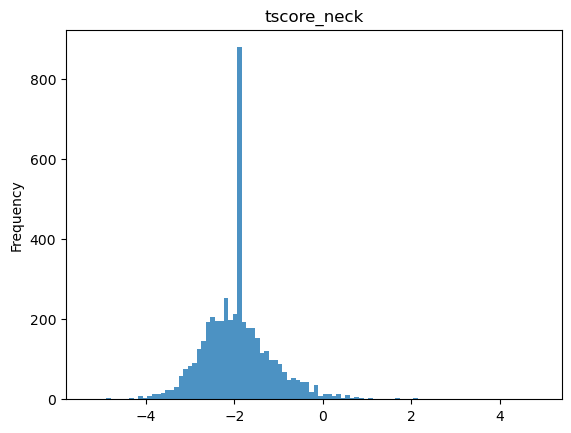

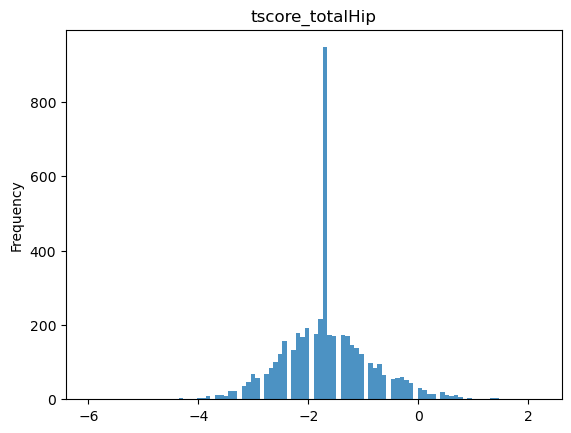

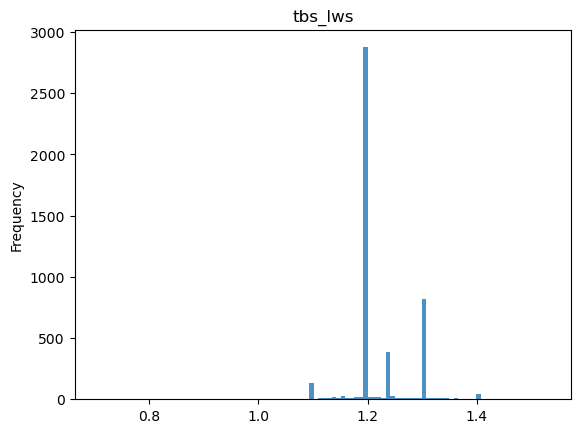

In [103]:
# visually inspect the imputed values
imputed_rows = df_densitometry_v3[df_densitometry_v3.index.isin(nan_rows.index)]

imputed_rows["tscore_lws"].plot(kind="hist", bins=100, alpha=0.8, title="tscore_lws")
plt.figure()
imputed_rows["tscore_neck"].plot(kind="hist", bins=100, alpha=0.8, title="tscore_neck")
plt.figure()
imputed_rows["tscore_totalHip"].plot(kind="hist", bins=100, alpha=0.8, title="tscore_totalHip")
plt.figure()
imputed_rows["tbs_lws"].plot(kind="hist", bins=100, alpha=0.8, title="tbs_lws")

In [104]:
df_densitometry_v3.to_csv("data/processed/densitometry.csv", index=False)

In [105]:
# Merge densitometry dataframe with df_followups
df_densitometry_v3 = pd.read_csv("data/processed/densitometry.csv", parse_dates=["densito_date"])
df_final = df_followups.merge(df_densitometry_v3, on=["patientId", "densito_date"], how="left")
df_final.drop("densito_date", axis=1, inplace=True)
df_final

,centerId,patientId,Datum,postmenopausal,praemenopausal,hrt,groesse,gewicht,bmi,schenkelhalsfraktur_eltern,osteoporotische_fraktur_eltern,corticosteroide,steroid_tagesdosis,prostatakarzinom,aromatase_hemmer,antiepileptika,rheumatoide_arthritis,bechterew,anzahl_stuerze,immobilitaet,diabetes,copd,gi_erkrankung,hypogonadismus_mann,menopause_unter_45,hyperpara,nierenfunktionsstoerung,alkohol,nikotin,abnahme_koerpergroesse,klopfschmerz_ws,hyperkyphose,sturztest_abnormal,hiv positiv,todesdatum,osteoporose ist todesursache,geschlecht,alter,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture,num_visits,tscore_lws,tscore_neck,tscore_totalHip,tbs_lws,tscore_lws_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_lws_imputed
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.689,28.689,28.689,28.689,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,-1.8,-1.2,1.470,0.0,0.0,0.0,0.0
1,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.574,27.574,27.574,27.574,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-2.6,-2.3,-2.0,1.169,0.0,0.0,0.0,0.0
2,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.164,28.164,28.164,28.164,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-3.8,-3.2,-3.1,1.290,0.0,0.0,0.0,0.0
3,8,5,2018-06-22,1.0,0.0,0.0,150.0,40.9,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.197,28.197,28.197,6.328,1.0,1.0,1.0,0.0,3.0,3.0,1.0,-3.1,-4.2,-3.3,1.100,1.0,0.0,0.0,1.0
4,8,6,2018-06-27,1.0,0.0,0.0,165.5,74.7,27.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,59.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.279,25.279,25.279,25.279,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-2.5,-1.3,-0.9,1.295,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,2,19583,2022-04-19,1.0,0.0,0.0,149.0,68.0,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,84.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033,0.033,0.033,0.033,0.0,1.0,1.0,0.0,2.0,2.0,1.0,-2.0,-2.9,-3.1,1.166,0.0,0.0,0.0,0.0
11622,2,19590,2020-01-15,1.0,0.0,0.0,151.0,79.0,34.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.049,27.049,27.049,27.049,1.0,1.0,1.0,1.0,1.0,3.0,1.0,-2.5,-2.8,-2.1,1.075,0.0,0.0,0.0,0.0
11623,2,19654,2020-02-13,1.0,0.0,0.0,156.5,73.0,29.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.1,0.0,0.0,0.0,0.0,0.0,0

#### Translate german column names to english

In [106]:
english_names = {
    "alter": "age",
    "geschlecht": "sex",
    "Datum": "date",
    "groesse": "height",
    "gewicht": "weight",
    "schenkelhalsfraktur_eltern": "hip_fracture_parents",
    "osteoporotische_fraktur_eltern": "osteoporotic_fracture_parents",
    "corticosteroide": "corticosteroids",
    "steroid_tagesdosis": "steroid_daily_dosage",
    "prostatakarzinom": "prostate_cancer",
    "aromatase_hemmer": "aromatase_inhibitors",
    "antiepileptika": "antiepileptic_drugs",
    "bechterew": "ankylosing_spondylitis",
    "rheumatoide_arthritis": "rheumatoid_arthritis",
    "diabetes": "type_1_diabetes",
    "anzahl_stuerze": "number_of_falls",
    "immobilitaet": "immobility",
    "gi_erkrankung": "gastrointestinal_disease",
    "menopause_unter_45": "early_menopause",
    "nierenfunktionsstoerung": "malfunction_of_kidney",
    "alkohol": "alcohol",
    "nikotin": "nicotin",
    "abnahme_koerpergroesse": "decrease_in_height",
    "klopfschmerz_ws": "low_back_pain",
    "hyperkyphose": "hyperkyphosis",
    "sturztest_abnormal": "falling_test_abnormal",
    "todesdatum": "deathdate",
    "osteoporose ist todesursache": "death_by_osteoporosis",
    "tscore_lws": "tscore_ls",
    "tscore_lws_imputed": "tscore_ls_imputed",
    "tbs_lws": "tbs_ls",
    "tbs_lws_imputed": "tbs_ls_imputed",
}
df_final = df_final.rename(columns=english_names)
df_final

,centerId,patientId,date,postmenopausal,praemenopausal,hrt,height,weight,bmi,hip_fracture_parents,osteoporotic_fracture_parents,corticosteroids,steroid_daily_dosage,prostate_cancer,aromatase_inhibitors,antiepileptic_drugs,rheumatoid_arthritis,ankylosing_spondylitis,number_of_falls,immobility,type_1_diabetes,copd,gastrointestinal_disease,hypogonadismus_mann,early_menopause,hyperpara,malfunction_of_kidney,alcohol,nicotin,decrease_in_height,low_back_pain,hyperkyphosis,falling_test_abnormal,hiv positiv,deathdate,death_by_osteoporosis,sex,age,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture,num_visits,tscore_ls,tscore_neck,tscore_totalHip,tbs_ls,tscore_ls_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_ls_imputed
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.689,28.689,28.689,28.689,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,-1.8,-1.2,1.470,0.0,0.0,0.0,0.0
1,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.574,27.574,27.574,27.574,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-2.6,-2.3,-2.0,1.169,0.0,0.0,0.0,0.0
2,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.164,28.164,28.164,28.164,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-3.8,-3.2,-3.1,1.290,0.0,0.0,0.0,0.0
3,8,5,2018-06-22,1.0,0.0,0.0,150.0,40.9,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,28.197,28.197,28.197,6.328,1.0,1.0,1.0,0.0,3.0,3.0,1.0,-3.1,-4.2,-3.3,1.100,1.0,0.0,0.0,1.0
4,8,6,2018-06-27,1.0,0.0,0.0,165.5,74.7,27.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,59.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,25.279,25.279,25.279,25.279,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-2.5,-1.3,-0.9,1.295,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,2,19583,2022-04-19,1.0,0.0,0.0,149.0,68.0,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,84.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.033,0.033,0.033,0.033,0.0,1.0,1.0,0.0,2.0,2.0,1.0,-2.0,-2.9,-3.1,1.166,0.0,0.0,0.0,0.0
11622,2,19590,2020-01-15,1.0,0.0,0.0,151.0,79.0,34.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,27.049,27.049,27.049,27.049,1.0,1.0,1.0,1.0,1.0,3.0,1.0,-2.5,-2.8,-2.1,1.075,0.0,0.0,0.0,0.0
11623,2,19654,2020-02-13,1.0,0.0,0.0,156.5,73.0,29.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.1,0.0,0.0,0.0,0.0,0.0,

In [107]:
# Make medicament columns binary
for col in df_final.loc[:,"Bisphosphonat_prior":"No_treatment"].columns:
    df_final.loc[:,col] = df_final.loc[:,col].apply(lambda x: int(bool(x)))
 
[df_final[col].value_counts() for col in df_final.loc[:,"Bisphosphonat_prior":"No_treatment"].columns]

[0    7587
 1    4039
 Name: Bisphosphonat_prior, dtype: int64,
 0    11361
 1      265
 Name: SERM_prior, dtype: int64,
 0    11543
 1       83
 Name: HRT_prior, dtype: int64,
 0    10047
 1     1579
 Name: Denosumab_prior, dtype: int64,
 0    11626
 Name: Romosozumab_prior, dtype: int64,
 0    10983
 1      643
 Name: Teriparatide_prior, dtype: int64,
 0    9339
 1    2287
 Name: Bisphosphonat_current, dtype: int64,
 0    11501
 1      125
 Name: SERM_current, dtype: int64,
 0    11326
 1      300
 Name: HRT_current, dtype: int64,
 0    10729
 1      897
 Name: Denosumab_current, dtype: int64,
 0    11622
 1        4
 Name: Romosozumab_current, dtype: int64,
 0    11377
 1      249
 Name: Teriparatide_current, dtype: int64,
 0    9526
 1    2100
 Name: Bisphosphonat_new, dtype: int64,
 0    11546
 1       80
 Name: SERM_new, dtype: int64,
 0    11585
 1       41
 Name: HRT_new, dtype: int64,
 0    10773
 1      853
 Name: Denosumab_new, dtype: int64,
 0    11622
 1        4
 Name: Ro

In [108]:
df_final.to_csv("data/final/data_imputed.csv", index=False)

In [109]:
df_final

,centerId,patientId,date,postmenopausal,praemenopausal,hrt,height,weight,bmi,hip_fracture_parents,osteoporotic_fracture_parents,corticosteroids,steroid_daily_dosage,prostate_cancer,aromatase_inhibitors,antiepileptic_drugs,rheumatoid_arthritis,ankylosing_spondylitis,number_of_falls,immobility,type_1_diabetes,copd,gastrointestinal_disease,hypogonadismus_mann,early_menopause,hyperpara,malfunction_of_kidney,alcohol,nicotin,decrease_in_height,low_back_pain,hyperkyphosis,falling_test_abnormal,hiv positiv,deathdate,death_by_osteoporosis,sex,age,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture,num_visits,tscore_ls,tscore_neck,tscore_totalHip,tbs_ls,tscore_ls_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_ls_imputed
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,73.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28.689,28.689,28.689,28.689,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-1.0,-1.8,-1.2,1.470,0.0,0.0,0.0,0.0
1,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,female,80.9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27.574,27.574,27.574,27.574,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-2.6,-2.3,-2.0,1.169,0.0,0.0,0.0,0.0
2,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,69.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28.164,28.164,28.164,28.164,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-3.8,-3.2,-3.1,1.290,0.0,0.0,0.0,0.0
3,8,5,2018-06-22,1.0,0.0,0.0,150.0,40.9,18.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,76.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,28.197,28.197,28.197,6.328,1.0,1.0,1.0,0.0,3.0,3.0,1.0,-3.1,-4.2,-3.3,1.100,1.0,0.0,0.0,1.0
4,8,6,2018-06-27,1.0,0.0,0.0,165.5,74.7,27.3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,59.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25.279,25.279,25.279,25.279,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-2.5,-1.3,-0.9,1.295,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,2,19583,2022-04-19,1.0,0.0,0.0,149.0,68.0,30.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,84.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.033,0.033,0.033,0.033,0.0,1.0,1.0,0.0,2.0,2.0,1.0,-2.0,-2.9,-3.1,1.166,0.0,0.0,0.0,0.0
11622,2,19590,2020-01-15,1.0,0.0,0.0,151.0,79.0,34.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,female,82.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,27.049,27.049,27.049,27.049,1.0,1.0,1.0,1.0,1.0,3.0,1.0,-2.5,-2.8,-2.1,1.075,0.0,0.0,0.0,0.0
11623,2,19654,2020-02-13,1.0,0.0,0.0,156.5,73.0,29.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,61.1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,26.295,26.295,26.295,26.295,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-2.8,-1.4,-0.5,1.340,0.0,0.0,0.0,0.0
11624,2,19708,2014-09-17,1.0,0.0,1.0,168.0,71.0,25.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.

In [110]:
df_train, df_test = train_test_split(df_final, test_size=0.2, random_state=train_test_seed, stratify=df_final[["any_right_censored", "num_visits"]])

display(df_train)
display(df_test)

,centerId,patientId,date,postmenopausal,praemenopausal,hrt,height,weight,bmi,hip_fracture_parents,osteoporotic_fracture_parents,corticosteroids,steroid_daily_dosage,prostate_cancer,aromatase_inhibitors,antiepileptic_drugs,rheumatoid_arthritis,ankylosing_spondylitis,number_of_falls,immobility,type_1_diabetes,copd,gastrointestinal_disease,hypogonadismus_mann,early_menopause,hyperpara,malfunction_of_kidney,alcohol,nicotin,decrease_in_height,low_back_pain,hyperkyphosis,falling_test_abnormal,hiv positiv,deathdate,death_by_osteoporosis,sex,age,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture,num_visits,tscore_ls,tscore_neck,tscore_totalHip,tbs_ls,tscore_ls_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_ls_imputed
10394,2,11797,2019-04-03,1.0,0.0,0.0,168.0,64.0,22.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,64.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,36.656,36.656,36.656,36.656,1.0,1.0,1.0,1.0,0.0,0.0,1.0,-2.7,-1.8,-1.9,1.116,0.0,0.0,0.0,0.0
10818,2,13122,2017-06-15,1.0,0.0,0.0,159.0,52.0,20.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,68.4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,61.180,61.180,61.180,32.230,1.0,1.0,1.0,0.0,1.0,2.0,2.0,-2.4,-1.8,-1.5,1.309,0.0,1.0,0.0,0.0
2742,7,1691,2021-09-21,1.0,0.0,0.0,164.0,50.0,18.6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,63.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8.230,8.230,8.230,8.230,1.0,1.0,1.0,1.0,0.0,1.0,6.0,-0.9,-2.2,-2.6,1.214,0.0,0.0,0.0,0.0
4771,2,3935,2019-05-27,1.0,0.0,0.0,159.0,45.0,17.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,female,65.7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,23.738,23.738,23.738,23.738,1.0,1.0,1.0,1.0,0.0,0.0,2.0,-2.4,-2.7,-2.2,1.351,0.0,0.0,0.0,0.0
1962,7,1253,2015-06-30,1.0,0.0,0.0,154.7,58.5,24.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,67.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,85.705,85.705,85.705,85.705,1.0,1.0,1.0,1.0,0.0,3.0,5.0,-1.0,-1.9,-1.3,1.299,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2104,7,1326,2013-12-02,1.0,0.0,0.0,147.0,57.0,26.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,55.9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,59.967,59.967,59.967,59.967,1.0,1.0,1.0,1.0,1.0,1.0,3.0,-2.5,-1.1,-0.6,1.200,0.0,0.0,0.0,1.0
3712,7,2440,2020-07-10,1.0,0.0,0.0,160.0,46.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,64.6,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,23.803,23.803,23.803,23.803,1.0,1.0,1.0,1.0,0.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10497,2,12060,2019-05-17,1.0,0.0,0.0,165.5,58.0,21.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,62.6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,26.066,26.066,26.066,26.066,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.4,-2.1,-2.4,1.316,0.0,0.0,0.0,0.0
10367,2,11728,2019-05-15,1.0,0.0,0.0,153.0,50.0,21.4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

,centerId,patientId,date,postmenopausal,praemenopausal,hrt,height,weight,bmi,hip_fracture_parents,osteoporotic_fracture_parents,corticosteroids,steroid_daily_dosage,prostate_cancer,aromatase_inhibitors,antiepileptic_drugs,rheumatoid_arthritis,ankylosing_spondylitis,number_of_falls,immobility,type_1_diabetes,copd,gastrointestinal_disease,hypogonadismus_mann,early_menopause,hyperpara,malfunction_of_kidney,alcohol,nicotin,decrease_in_height,low_back_pain,hyperkyphosis,falling_test_abnormal,hiv positiv,deathdate,death_by_osteoporosis,sex,age,Bisphosphonat_prior,SERM_prior,HRT_prior,Denosumab_prior,Romosozumab_prior,Teriparatide_prior,Bisphosphonat_current,SERM_current,HRT_current,Denosumab_current,Romosozumab_current,Teriparatide_current,Bisphosphonat_new,SERM_new,HRT_new,Denosumab_new,Romosozumab_new,Teriparatide_new,No_treatment,vertebral_fracture,hip_fracture,wrist_fracture,any_fracture,vertebral_right_censored,hip_right_censored,wrist_right_censored,any_right_censored,recent_fracture,previous_fracture,num_visits,tscore_ls,tscore_neck,tscore_totalHip,tbs_ls,tscore_ls_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_ls_imputed
4277,2,3391,2019-11-14,1.0,0.0,0.0,173.0,64.0,21.4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,62.8,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,11.934,11.934,11.934,11.934,1.0,1.0,1.0,1.0,1.0,3.0,2.0,-1.9,-2.2,-1.0,1.200,0.0,0.0,0.0,1.0
3272,7,1993,2019-06-01,1.0,0.0,0.0,154.0,90.0,37.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,female,91.0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,39.541,39.541,39.541,39.541,1.0,1.0,1.0,1.0,3.0,5.0,5.0,-3.8,-2.9,-3.4,1.366,0.0,0.0,0.0,0.0
4768,2,3932,2015-03-20,1.0,0.0,0.0,162.0,95.0,36.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,59.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,59.344,59.344,59.344,59.344,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,-1.2,-0.3,1.411,0.0,0.0,0.0,0.0
6144,2,5506,2016-07-25,1.0,0.0,0.0,166.0,70.0,25.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,75.6,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,72.787,72.787,72.787,72.787,1.0,1.0,1.0,1.0,0.0,4.0,3.0,-2.7,-2.0,-3.5,1.200,0.0,0.0,0.0,1.0
5762,2,5084,2016-11-07,1.0,0.0,0.0,160.0,67.0,26.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,68.8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,62.885,62.885,62.885,62.885,1.0,1.0,1.0,1.0,1.0,1.0,2.0,-1.1,-2.2,-1.1,1.292,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758,2,3921,2015-12-01,1.0,0.0,0.0,154.0,73.0,30.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,65.7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,56.656,56.656,56.656,56.656,1.0,1.0,1.0,1.0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
366,7,356,2018-11-05,1.0,0.0,0.0,156.5,90.0,36.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,female,55.1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,39.738,39.738,39.738,39.738,1.0,1.0,1.0,1.0,0.0,0.0,3.0,-0.9,-1.1,0.1,1.421,0.0,0.0,0.0,0.0
2271,7,1426,2016-10-26,1.0,0.0,0.0,162.7,48.0,18.1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,female,58.9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,72.295,72.295,72.295,72.295,1.0,1.0,1.0,1.0,0.0,2.0,3.0,-2.2,-0.9,-1.2,1.241,0.0,0.0,0.0,0.0
3822,7,2629,2020-09-28,1.0,0.0,0.0,163.0,55.0,20.7,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [111]:
df_train.to_csv("data/final/train.csv", index=False)
df_test.to_csv("data/final/test.csv", index=False)